# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## First: things we didn't cover in class

### Counting things

If during class we had wanted to know how many countries were on each continent, I would use `df.continent.value_counts()`.

Lots of people like to try `groupby` when you're counting things, but in pandas there is only one rule: **every time you want to count things and think you should use groupby.... don't use `groupby`!** Instead use `value_counts()`.

### Filtering your dataset

We also spent the whole time working with the entire dataset! Oftentimes you only want a subset of it.

We might have wanted to do something like "I only want to see countries in Africa." In the same way we can do math to every single row at the same time, we can also do comparisons for every single row. We could have asked, "is your `continent` column equal to `"Africa"`?"

```python
df.continent == 'Africa'
```

This only gives me a list of Trues and Falses, which isn't very useful by itself (...technically it's a Series since it has an index). What *is* very useful is being able to say, **I want to see all of the rows where the continent is Africa:**

```python
df[df.continent == 'Africa']
```

There we have it! I could also save this as another variable if I wanted to spend time working with it later:

```python
df_africa = df[df.continent == 'Africa']
df_africa.head()
```

Hope that's helpful.

### Graphing things

Just put `.plot()` on the end of whatever you're looking at. It works like 75% of the time!

```python
df.groupby('continent').population.sum().plot(kind='barh')
```

The code above will give me a horizontal bar graph of the sum of each continent's population. Technically speaking it works because it's a Series and it plots the index vs the values. 

If you have a full dataframe, though, you usually need to give it the `x` and `y`.

```python
df.plot(x='life_expectancy', y='per_capita_gdp', kind='scatter')
```

This will give you a scatterplot of each country's life expectancy vs. its per-capita GDP.

## 0) Setup

Import pandas **with the correct name**.

In [1]:
import pandas as pd 

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [2]:
print(pd.read_csv("animals.csv", encoding="utf-8"))
df = pd.read_csv("animals.csv", encoding="utf-8")

  animal        name  length
0    cat        Anne      35
1    cat         Bob      45
2    dog  Egglesburg      65
3    dog       Devon      50
4    cat     Charlie      32
5    dog    Fontaine      35
6    cat      Xypher      10


2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
#(number of rows, number of columns)
df.shape

(7, 3)

In [4]:
#Source: https://moonbooks.org/Articles/How-to-get-the-names-titles-or-labels-of-a-pandas-data-frame-in-python-/
df.loc[0,:]

animal     cat
name      Anne
length      35
Name: 0, dtype: object

In [5]:
df.head(10)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


In [50]:
df.dtypes

animal     object
name       object
length      int64
inches    float64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [6]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [6]:
df.sort_values(by = 'length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

> **Tip:** You don't know how to do standard deviation, but remember when we did `df.so` and hit tab and it suggested some options for sorting? I'm assuming the standard deviation method starts with `s`....

In [7]:
#df.so
#press shift and double tap tab for more info / documentation
#press tab

In [8]:
df.length.describe()

count     7.000000
mean     38.857143
std      17.101935
min      10.000000
25%      33.500000
50%      35.000000
75%      47.500000
max      65.000000
Name: length, dtype: float64

In [9]:
#df.length.mean()
#df.length.std()

In [10]:
#df.plot()

## 6) How many cats do we have and how many dogs?

In [11]:
#df.groupby(by='animal').count()

In [12]:
df['animal'].value_counts()

cat    4
dog    3
Name: animal, dtype: int64

In [13]:
#reference, df.continent.value_counts()

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [14]:
#df.animal == 'dog' means “are you a dog?” 
#df.animal = 'dog'  means “you are all dogs now!” 

In [15]:
df[df.animal == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [16]:
#references
#df.groupby(by='animal').count()
#df['per_capita_gdp'] = df.gdp / df.population
#df.sort_values(by='population', ascending=False).head()
#if there are spaces, needs square brackers df['population']

# df[sort_values(by='animal'), ascending=False]
# df.groupby[sort_values(by='animal').count()

## 8) Only display the animals that are longer than 40cm

In [17]:
df[df.length > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [18]:
df['inches'] = (df['length'] / (2.54))

In [19]:
df.insert(1, "inches", df['inches'])

ValueError: cannot insert inches, already exists

In [20]:
df

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
4,cat,Charlie,32,12.598425
5,dog,Fontaine,35,13.779528
6,cat,Xypher,10,3.937008


In [21]:
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html#pandas.DataFrame.insert

## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [22]:
cats = df[df.animal == 'cat']

In [23]:
dogs = df[df.animal == 'dog']

In [24]:
cats.head(10)

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425
6,cat,Xypher,10,3.937008


In [25]:
dogs.head(10)

,animal,name,length,inches
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
5,dog,Fontaine,35,13.779528


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [26]:
cats[cats.inches > 12]

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [27]:
df[(df.animal == 'cat') & (df.inches > 12)]

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [28]:
cats.length.mean()

30.5

In [29]:
dogs.length.mean()

50.0

## 13) If you didn't already, use `groupby` to do #12 all at once

In [30]:
df.groupby(by='animal').length.mean()

animal
cat    30.5
dog    50.0
Name: length, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

In [31]:
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html 
#Source2: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

<AxesSubplot:ylabel='Frequency'>

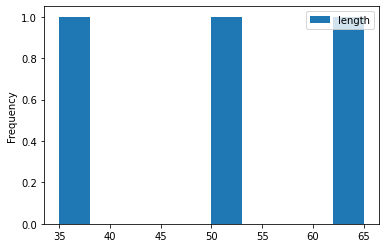

In [32]:
dogs.plot.hist(y ='length')

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

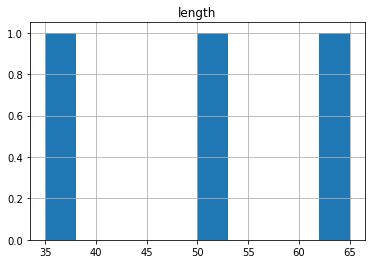

In [33]:
dogs.hist(column='length')

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

In [34]:
#df['length'].plot.barh(x='name', y='length', figsize = (20,10), xlabel='name', ylabel='length')

<AxesSubplot:ylabel='name'>

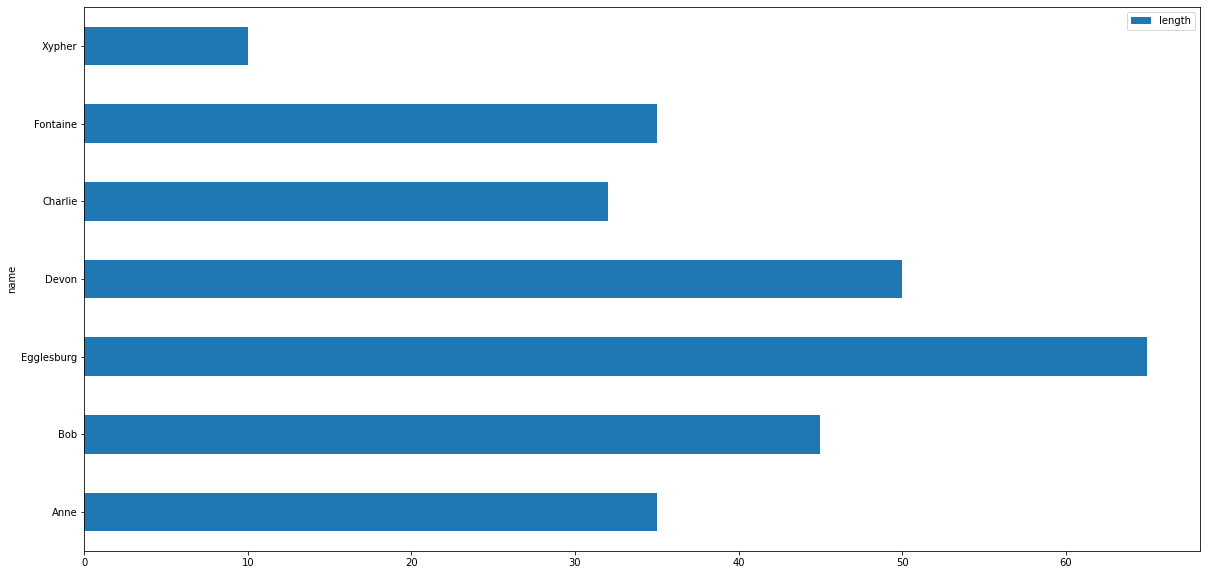

In [35]:
df.plot.barh(x='name', y='length', figsize = (20,10), xlabel='name', ylabel='length')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

In [36]:
#df.sort_values(by = 'length', ascending=False).head(3)

<AxesSubplot:ylabel='Cats'>

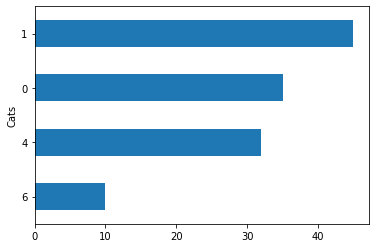

In [37]:
cats['length'].sort_values(ascending=True).plot.barh(x='animal', y='length', rot=0, xlabel='Cats', ylabel='Length in cm')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [40]:
#Source: https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [38]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [39]:
title = "Number of animals"

In [40]:
#df[df.animal == 'dog'] groupby(by='animal').count()

In [41]:
#count = df['animal'].count()

In [42]:
#source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [43]:
#'animal" == "Number of animals"

Text(0.7, 50, 'Number of Cats')

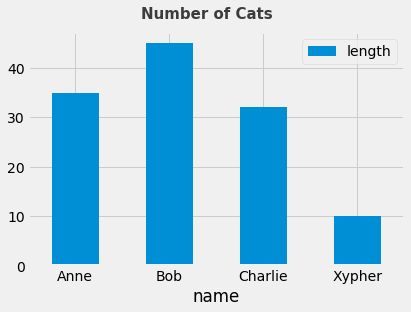

In [44]:
graph = cats.plot.bar(x = 'name', y = 'length', rot=0) 
#ax = cats.plot.bar(rot=0)
graph.text(x = 0.7, y = 50, s = 'Number of Cats', fontsize = 15, weight = 'bold', alpha = .75)

Text(0.5, 72, 'Number of Dogs')

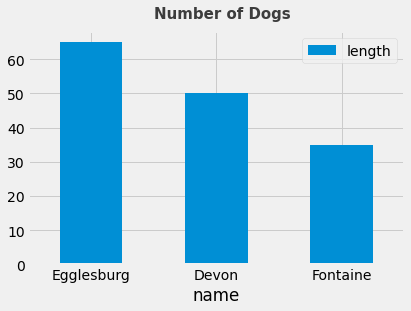

In [45]:
graph = dogs.plot.bar(x = 'name', y = 'length', rot=0) 
graph.text(x = 0.5, y = 72, s = 'Number of Dogs', fontsize = 15, weight = 'bold', alpha = .75)

In [46]:
#graph = dogs.plot(x = 'animal', y = 'length', figsize = (12,8)) 

In [47]:
#print('Type:', type(538graph))

In [48]:
# x = df.linspace(0, 10)
# df.random.seed(19680801)

In [49]:
#Source: https://www.dataquest.io/blog/making-538-plots/

In [50]:
#
# import matplotlib.pyplot as plt
# import numpy as np


# plt.style.use('fivethirtyeight')

# x = np.linspace(0, 10)

# # Fixing random state for reproducibility
# np.random.seed(19680801)

# fig, ax = plt.subplots()

# ax.plot(x, np.sin(x) + x + np.random.randn(50))
# ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
# ax.plot(x, np.sin(x) + np.random.randn(50))
# ax.set_title("'fivethirtyeight' style sheet")

# plt.show()